In [0]:
!pip install seaborn==0.9.0
import pandas as pd
import numpy as np

notas = pd.read_csv("ratings.csv")
notas.columns = ["usuarioID", "FilmeID", "nota", "momento"]



In [0]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [0]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [0]:
notas['nota'].mean()

3.501556983616962

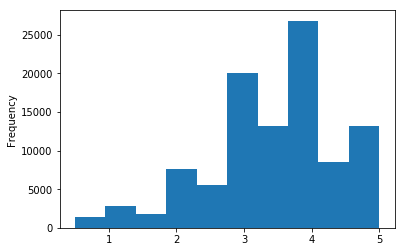

In [0]:
notas.nota.plot(kind="hist")

In [0]:
notas.nota.head()


0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

In [0]:
notas.iloc[85270]

usuarioID          554.0
FilmeID           2497.0
nota                 3.0
momento      944899443.0
Name: 85270, dtype: float64

In [0]:
notas_mod = notas.drop([85270])

In [0]:
notas_mod.iloc[85270]


usuarioID          554.0
FilmeID           2541.0
nota                 4.0
momento      944899564.0
Name: 85271, dtype: float64

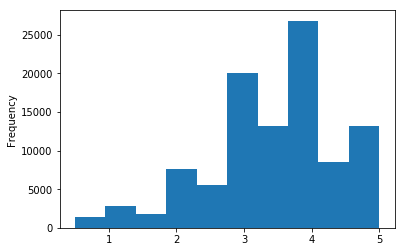

In [0]:
notas_mod.nota.plot(kind="hist")

In [0]:
notas_mod.nota.mean()

3.5015619576535926

In [0]:
notas_mod['nota'].median()

3.5

In [0]:
notas_mod.nota.describe()

count    100835.000000
mean          3.501562
std           1.042533
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

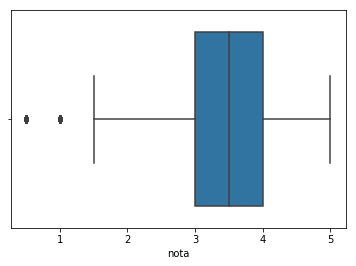

In [0]:
import seaborn as sns

sns.boxplot(notas_mod.nota)

In [0]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["FilmeID","Titulo","Generos"]
filmes.head()

,FilmeID,Titulo,Generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#Média de notas por filme


In [0]:
notas_mod.query("FilmeID==1").nota.mean()

3.9209302325581397

In [0]:
notas_mod.query("FilmeID==2").nota.mean()

3.4318181818181817

In [0]:
media_por_filme = notas_mod.groupby("FilmeID").mean().nota
media_por_filme.head()

FilmeID
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

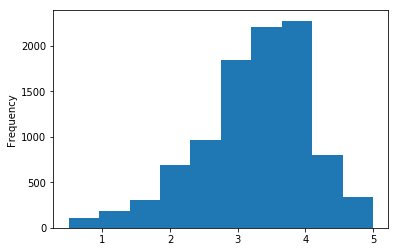

In [0]:
media_por_filme.plot(kind="hist")

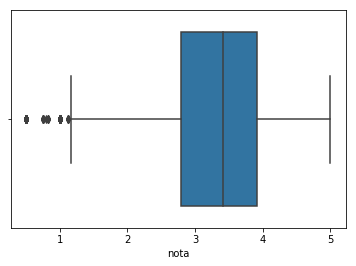

In [0]:
sns.boxplot(media_por_filme)

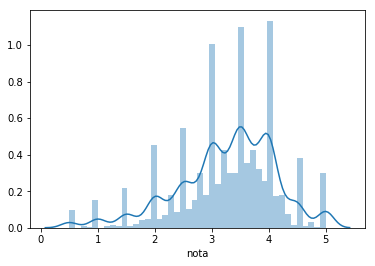

In [0]:
sns.distplot(media_por_filme)

In [0]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [0]:
tmdb.original_language.unique()


array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [0]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


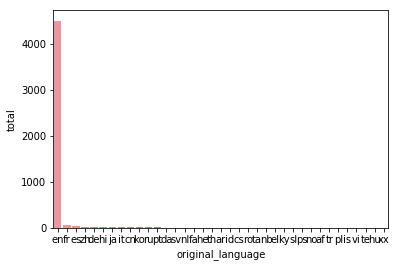

In [0]:
sns.barplot(x='original_language', y='total', data = contagem_de_lingua)

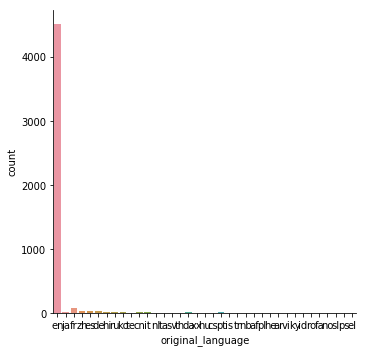

In [0]:
sns.catplot(x='original_language', kind='count', data = tmdb)

In [0]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x7f0c40eaca90>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text

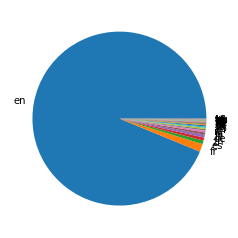

In [0]:
plt.pie(contagem_de_lingua.total, labels = contagem_de_lingua.original_language)

In [0]:
total_por_lingua = tmdb.original_language.value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_do_resto)

298


In [0]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_do_resto]
}
print (dados)

{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}


In [0]:
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


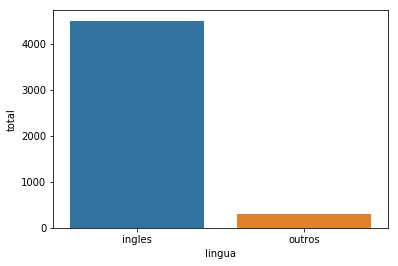

In [0]:
sns.barplot(x="lingua", y = "total", data = dados)

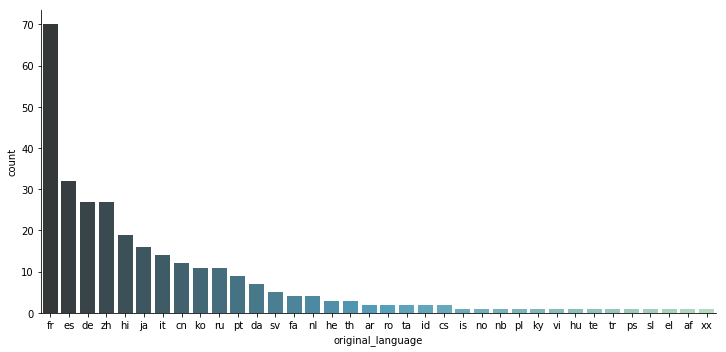

In [0]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
sns.catplot(x= "original_language", kind="count", data = filmes_sem_lingua_original_em_ingles, aspect = 2, palette = 'GnBu_d', order = total_por_lingua_de_outros_filmes.index )

In [51]:
filmes.head(2)

,FilmeID,Titulo,Generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [53]:
notas_toy_story = notas.query('FilmeID == 1')
notas_jumanji = notas.query('FilmeID == 2')

,usuarioID,FilmeID,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
1772,18,1,3.5,1455209816
2274,19,1,4.0,965705637
3219,21,1,3.5,1407618878
4059,27,1,3.0,962685262
4879,31,1,5.0,850466616


In [56]:
print("Nota média do Toy Story %.2f" % notas_toy_story.nota.mean())
print("Nota média do Jumanji %.2f" % notas_jumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


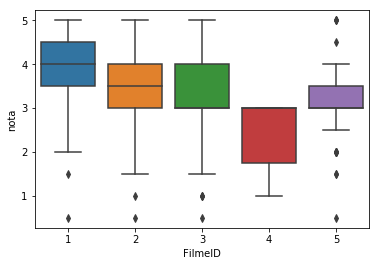

In [60]:
import numpy as np
sns.boxplot(x="FilmeID", y= "nota", data = notas.query("FilmeID in [1,2,3,4,5]"))

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


{'boxes': [<matplotlib.lines.Line2D at 0x7f0c3edcd438>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0c3edcdc18>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0c3edd7630>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0c3edd72e8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0c3edcd588>,
  <matplotlib.lines.Line2D at 0x7f0c3ede0048>]}

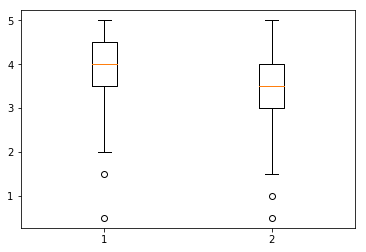

In [65]:
plt.boxplot([notas_toy_story.nota,notas_jumanji.nota])